# Avaliação e Refinamento do Modelo.

In [1]:
# Instalar bibliotecas.
#%pip install pandas matplotlib scipy scikit-learn seaborn ipywidgets

Este conjunto de dados foi hospedado no objeto IBM Cloud. Clique <a href="https://cocl.us/DA101EN_object_storage">AQUI</a> para armazenamento gratuito.


In [41]:
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
# Importanto os dados limpos.
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

#### Dropando colunas e traduzindo.

In [3]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
termos_traduzidos = [
    'classificação', 'perdas-normalizadas', 'fabricante', 'aspiraçao', 'num-de-portas',
    'estilo-de-carro', 'tracao', 'localizacao-do-motor', 'distancia-entre-eixos', 'comprimento',
    'largura', 'altura', 'peso-do-meio-fio', 'tipo-de-motor', 'num-de-cilindros',
    'tamanho-do-motor', 'sistema-de-combustível', 'diametro-do-cilindro', 'curso-do-pistao', 'taxa-de-compressao',
    'potencia', 'rpm-pico', 'consumo-na-cidade', 'consumo-na-estrada', 'preco',
    'consumo-na-cidade-L/100km', 'potencia-categorizada', 'diesel', 'gasolina'
]
df.columns = termos_traduzidos
df.head()

,classificação,perdas-normalizadas,fabricante,aspiraçao,num-de-portas,estilo-de-carro,tracao,localizacao-do-motor,distancia-entre-eixos,comprimento,...,taxa-de-compressao,potencia,rpm-pico,consumo-na-cidade,consumo-na-estrada,preco,consumo-na-cidade-L/100km,potencia-categorizada,diesel,gasolina
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.to_csv('carros85_clean.csv')

Primeiro iremos usar somente os dados numericos

In [5]:
df=df._get_numeric_data()
df.head()

,classificação,perdas-normalizadas,distancia-entre-eixos,comprimento,largura,altura,peso-do-meio-fio,tamanho-do-motor,diametro-do-cilindro,curso-do-pistao,taxa-de-compressao,potencia,rpm-pico,consumo-na-cidade,consumo-na-estrada,preco,consumo-na-cidade-L/100km,diesel,gasolina
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


### Funções para gráficos.

In [10]:
def DistributionPlot(FuncaoVermelha, FuncaoAzul, NomeVermelho, NomeAzul, Titulo):
    largura = 12
    altura = 10
    plt.figure(figsize=(largura, altura))

    ax1 = sns.kdeplot(FuncaoVermelha, color="r", label=NomeVermelho)
    ax2 = sns.kdeplot(FuncaoAzul, color="b", label=NomeAzul, ax=ax1)

    plt.title(Titulo)
    plt.xlabel('Preco em U$')
    plt.ylabel('Proporção de Carros')
    plt.show()
    plt.close()

In [11]:
def PollyPlot(xtreino, xteste, y_treino, y_teste, lr,poly_transform):
    largura = 12
    altura = 10
    plt.figure(figsize=(largura, altura))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtreino.values.max(), xteste.values.max()])

    xmin=min([xtreino.values.min(), xteste.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtreino, y_treino, 'ro', label='Dados de Treinamento')
    plt.plot(xteste, y_teste, 'go', label='Dados de Teste')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Função de Previsão')
    plt.ylim([-10000, 60000])
    plt.ylabel('Preço')
    plt.legend()

## Treino e Teste.

In [12]:
# dados com o target
y_data = df['preco']

In [14]:
x_data=df.drop('preco',axis=1)

In [18]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Numero de amostras de teste: ", x_teste.shape[0])
print("Numero de amostras de treino: ",x_treino.shape[0])


Numero de amostras de teste:  21
Numero de amostras de treino:  180


In [19]:
# Novo conjunto de testes
x_treino1, x_teste1, y_treino1, y_teste1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)

print("Numero de amostras de teste: ", x_teste1.shape[0])
print("Numero de amostras de treino: ",x_treino1.shape[0])


Numero de amostras de teste:  81
Numero de amostras de treino:  120


Ajustamos o modelo usando o recurso “potência”:

In [23]:
lre=LinearRegression()
lre.fit(x_treino[['potencia']], y_treino)

LinearRegression()

In [26]:
print('O coeficiente de determinação:', lre.score(x_teste[['potencia']], y_teste))

O coeficiente de determinação: 0.3635875575078824


In [27]:
print('O coeficiente de determinação:',lre.score(x_treino[['potencia']], y_treino))

O coeficiente de determinação: 0.6619724197515103


Podemos perceber que o coeficiente de determinação "R²", é muito menor utilizando as amostras de teste comparadas com as de treino.

In [30]:
lre.fit(x_treino1[['potencia']],y_treino1)
print('O coeficiente de de determinação: ', lre.score(x_teste1[['potencia']],y_teste1))

O coeficiente de de determinação:  0.7139364665406974


Para o modelo utilizando 40% do dataset o coeficiente ja sobe, ~0.71.

<h2>Cross-Validation Score</h2>


Inserimos o objeto, o recurso ("potencia") e os dados de destino (y_data). O parâmetro 'cv' determina o número de dobras. Neste caso, é 4.

In [36]:
Rcross = cross_val_score(lre, x_data[['potencia']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [37]:
print("A média das dobras ", Rcross.mean(), "e o desvio padrão " , Rcross.std())

A média das dobras  0.522009915042119 e o desvio padrão  0.2911839444756029


Podemos usar o erro quadrático negativo como pontuação definindo a métrica do parâmetro 'pontuação' como 'neg_mean_squared_error'.

In [38]:
-1 * cross_val_score(lre,x_data[['potencia']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

Agora um teste usando só 2 dobras.

In [39]:
Rc=cross_val_score(lre,x_data[['potencia']], y_data,cv=2)
Rc.mean()

0.5166761697127431

In [40]:
print("A média das dobras ", Rc.mean(), "e o desvio padrão " , Rc.std())

A média das dobras  0.5166761697127431 e o desvio padrão  0.07348004195771368


Usar a função 'cross_val_predict' para prever a saída. A função divide os dados em um número especificado de dobras, com uma dobra para teste e as outras dobras são usadas para treinamento. 

In [42]:
yhat = cross_val_predict(lre,x_data[['potencia']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting, Underfitting e Seleção de Modelo

Acontece que os dados de teste, às vezes chamados de "dados fora da amostra", são uma medida muito melhor do desempenho do seu modelo no mundo real. Uma razão para isso é o overfitting.

Vejamos alguns exemplos. Acontece que essas diferenças são mais aparentes na regressão linear múltipla e na regressão polinomial, portanto exploraremos o sobreajuste nesse contexto.

Múltiplos objetos de regressão linear e treinar o modelo usando 'cavalo-vapor', 'peso-meio-fio', 'tamanho do motor' e 'rodovia-mpg' como recursos.

In [44]:
lr = LinearRegression()
lr.fit(x_treino[['potencia', 'peso-do-meio-fio', 'tamanho-do-motor', 'consumo-na-estrada']], y_treino)

LinearRegression()

Previsão usando dados de treinamento:

In [46]:
yhat_treino = lr.predict(x_treino[['potencia', 'peso-do-meio-fio', 'tamanho-do-motor', 'consumo-na-estrada']])
yhat_treino[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Previsão usando dados de teste:

In [48]:
yhat_teste = lr.predict(x_teste[['potencia', 'peso-do-meio-fio', 'tamanho-do-motor', 'consumo-na-estrada']])
yhat_teste[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

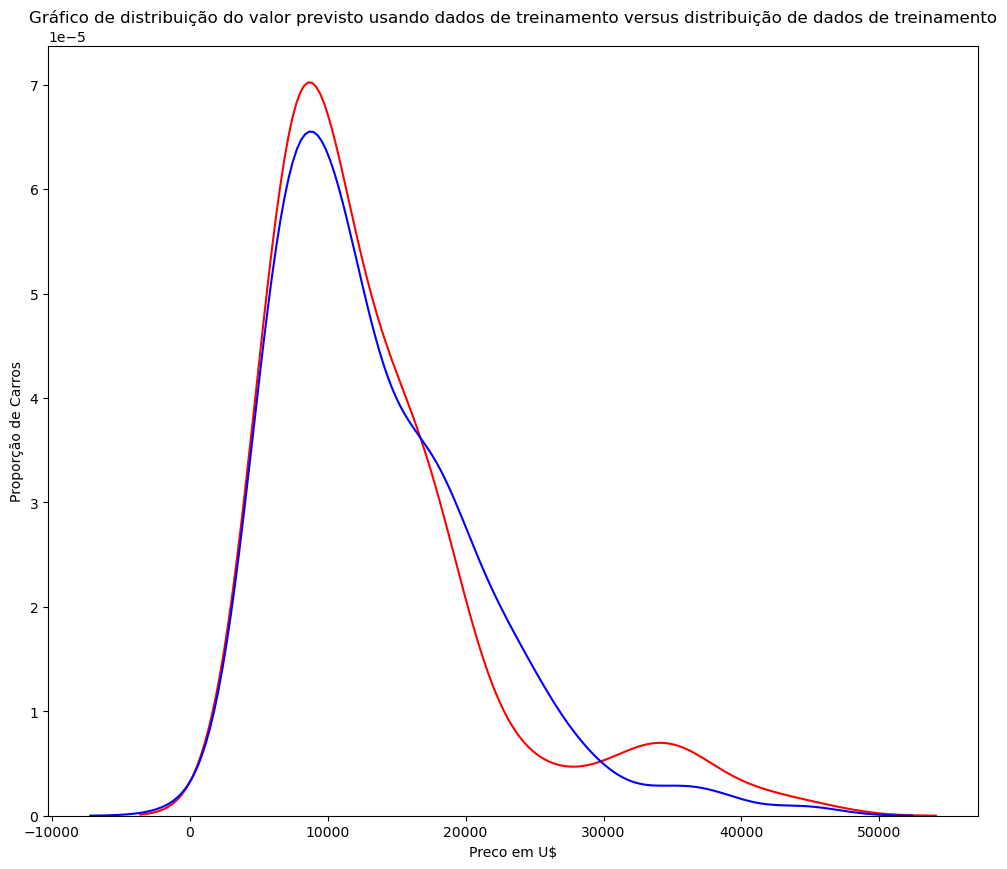

In [53]:
Title = 'Gráfico de distribuição do valor previsto usando dados de treinamento versus distribuição de dados de treinamento'
DistributionPlot(y_treino, yhat_treino, "Valores Atuais (Treino)", "Valores Previstos (Treino)", Title)

Comparação com os valores reais dos dados de treinamento.